<a href="https://colab.research.google.com/github/weibb123/Monte_Carlo_onSP500/blob/main/Monte_carlo_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependencies

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# extract SP500
voo = yf.Ticker("VOO")

In [16]:
# Let's visualize the VOO stocks for the past 1 years
data = voo.history(period='1Y')
df = pd.DataFrame(data)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-05-04 00:00:00-04:00,368.252239,368.518193,365.375901,366.577667,4421500,0.0,0.0,0.0
2023-05-05 00:00:00-04:00,370.123840,374.408827,369.818476,373.305573,3134100,0.0,0.0,0.0
2023-05-08 00:00:00-04:00,373.738994,373.945846,372.231864,373.512421,2957600,0.0,0.0,0.0
2023-05-09 00:00:00-04:00,372.064445,372.921437,371.690120,371.897003,2271000,0.0,0.0,0.0
2023-05-10 00:00:00-04:00,374.595982,375.137749,370.025351,373.522278,3512900,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-04-29 00:00:00-04:00,468.839996,469.420013,466.209991,468.839996,3253200,0.0,0.0,0.0
2024-04-30 00:00:00-04:00,467.420013,468.339996,461.359985,461.429993,4364800,0.0,0.0,0.0
2024-05-01 00:00:00-04:00,460.769989,467.070007,459.440002,459.929993,6115400,0.0,0.0,0.0


In [17]:
# Calculate daily returns
daily_returns = df["Close"].pct_change().dropna()
print(daily_returns)

Date
2023-05-05 00:00:00-04:00    0.018353
2023-05-08 00:00:00-04:00    0.000554
2023-05-09 00:00:00-04:00   -0.004325
2023-05-10 00:00:00-04:00    0.004370
2023-05-11 00:00:00-04:00   -0.001398
                               ...   
2024-04-29 00:00:00-04:00    0.003489
2024-04-30 00:00:00-04:00   -0.015805
2024-05-01 00:00:00-04:00   -0.003251
2024-05-02 00:00:00-04:00    0.009328
2024-05-03 00:00:00-04:00    0.012408
Name: Close, Length: 251, dtype: float64


In [18]:
# Simulation parameters
num_simulations = 1000
forecast_days = 365

# Initialise simulation array, all zeros
simulations = np.zeros((num_simulations, forecast_days))

# Simulate future paths
last_price = df["Close"].iloc[-1]
for i in range(num_simulations):
    cumulative_returns = np.random.choice(daily_returns, size=forecast_days, replace=True).cumsum()
    simulations[i, :] = last_price * (1 + cumulative_returns)


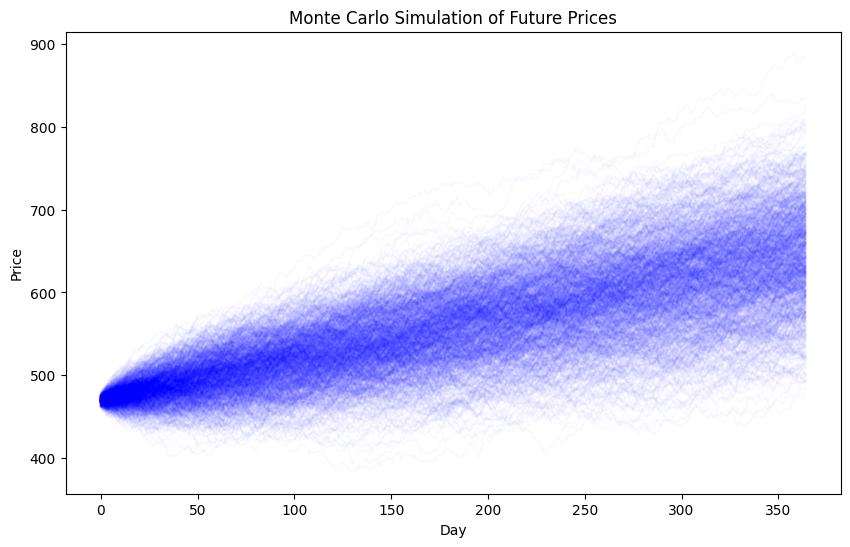

In [19]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(simulations.T, color="blue", alpha=0.025)
plt.title("Monte Carlo Simulation of Future Prices")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

# Monte Carlo

The practical application of Monte Carlo Simulation in assessing investment risk and making investment decisions involves several key steps. By understanding the range and distribution of potential future prices generated by the simulation shown in Part 1, investors can quantify the risk and potential return of an investment.

1. Defining Investment Objectives and Risk Tolerance

An investor will start by defining their investment objectives, including the expected return and the level of risk they are willing to tolerate. Risk tolerance can be influenced by factors such financial goals, and the investor’s personal comfort with uncertainty.

2. Running the Monte Carlo Simulation

Using historical data, a large number of simulations are run to project future price paths for the investment under consideration (stocks, cryptocurrencies, etc.). Each simulation represents a possible future scenario based on the random occurrence of daily returns, mirroring historical volatility and return patterns. Hopefully this was clear from Part 1.

3. Analysing the Simulation Output

The output of the Monte Carlo Simulation provides a range of possible future prices at a specified time in the future. This range is then analysed to understand the potential outcomes of the investment. Key metrics derived from the simulation include:

**Probability Distributions**:

Investors will look at the distribution of simulated end prices to understand the spread of outcomes. For example, a wide spread indicates high volatility and hence higher risk.

**Value at Risk (VaR)**:

This metric estimates the maximum potential loss over a specified time frame at a given confidence level. For instance, a 95% VaR of $100 means that there is a 95% chance that the investor will not lose more than $100 over the specified period.

**Expected Tail Loss (ETL)**:

ETL provides an average of the losses that occur beyond the VaR threshold, offering insight into the potential losses in the worst-case scenarios.

**Making Informed Decisions**

Based on the analysis, investors can make informed decisions by comparing the risk and return profile revealed by the Monte Carlo Simulation against their investment objectives and risk tolerance. For instance:

If the probability of achieving the desired return exceeds the investor’s threshold for success and the associated risks (VaR, ETL) are within their risk tolerance, the investment might be considered acceptable.

If the simulation shows a high probability of returns falling short of goals or risks exceeding the investor’s tolerance, they might decide to adjust their investment strategy. This could involve diversifying the portfolio, choosing investments with different risk-return profiles, or altering the investment horizon.

Practical Example:

I want to consider investing 10k USD in the S&P 500, and I want to use Monte Carlo Simulation to assess the risk. The simulation should show that, with 95% confidence, the investment will not lose more than $2000 over the next year 95% VaR. Additionally, the simulation should indicate theres a 50% chance of achieving at least a 10% return.

As an example, my risk tolerance allows for a potential $2000 loss and the goal is a 10% return, this investment might be considered within acceptable risk parameters. However, if the potential loss exceeds the investor’s risk tolerance, or if the likelihood of achieving the desired return is deemed too low, the investor might look for alternatives or modify the investment amount.



In [20]:
# Calculate daily returns
daily_returns = df["Close"].pct_change().dropna()

# Simulation parameters
initial_investment = 10000  # Initial investment amount
num_simulations = 1000  # Number of simulations
forecast_days = 365  # Investment horizon in days
desired_return = 0.10  # Desired return (10%)

# Calculate the average daily return
average_daily_return = daily_returns.mean()

# Calculate volatility as the standard deviation of daily returns
volatility = daily_returns.std()

print(f"Average Daily Return: {average_daily_return}")
print(f"Volatility: {volatility}")

Average Daily Return: 0.001017305738065212
Volatility: 0.00734604252841977


In [21]:
# Simulating future returns
simulated_end_returns = np.zeros(num_simulations)
for i in range(num_simulations):
    random_returns = np.random.normal(average_daily_return, volatility, forecast_days)
    cumulative_return = np.prod(1 + random_returns)
    simulated_end_returns[i] = initial_investment * cumulative_return

# Calculate the final investment values
final_investment_values = simulated_end_returns

print(final_investment_values)

[15297.41034705 13577.51386487 12268.8751939  13632.64136509
 14577.20573345 14996.29498568 14554.17600173 15464.24564766
 13785.43964434 13232.20730494 12879.55078722 11319.84367551
 18461.35007711 15422.91940909 13306.6714624  15455.67878039
 11462.41673637 14516.94125784 16152.50574161 12131.4237507
 14847.89997211 16782.84583193 14175.06146796 14124.08311443
 15009.64480164 14590.16753827 12636.01896079 12346.50094681
 13914.4895397  14126.31800777 14681.01928016 15407.9723332
 12922.204734   14864.94829477 16790.60271571 14146.37987052
 13952.43011534 11526.86270103 16030.57443003 13198.14457815
 15322.04600057 11748.98999019 13451.34410472 12628.89940223
 13845.14815712 15852.86004045 17151.98937171 15944.5435083
 15677.94441493 13105.5735095  16530.50570795 11595.61203161
 12742.11840593 15095.69414184 13994.31659667 18384.77224807
 15397.91816454 14335.29146791 13440.82354254 16390.51450844
 12669.58454974 11082.5849536  13274.74660397 12521.10466703
 13355.20905552 11900.39439

In [22]:
confidence_level = 0.95
sorted_returns = np.sort(final_investment_values)
index_at_var = int((1-confidence_level) * num_simulations)
var = initial_investment - sorted_returns[index_at_var]
conditional_var = initial_investment - sorted_returns[:index_at_var].mean()

print(f"Value at Risk (95% confidence): ${var:,.2f}")
print(f"Expected Tail Loss (Conditional VaR): ${conditional_var:,.2f}")

Value at Risk (95% confidence): $-1,448.69
Expected Tail Loss (Conditional VaR): $-832.40


Value at Risk:

We are 95% sure that the worse you can do, is to gain/lose XXX amount

On average, in those worst scenarios, If it gets worse

you expect to gain/lose about XXX amount this to happen

## Continue Exploration

In [23]:
num_success = np.sum(final_investment_values >= initial_investment * (1 + desired_return))
probability_of_success = num_success / num_simulations

print(f"Probability of achieving at least a {desired_return*100}% return: {probability_of_success*100:.2f}%")

Probability of achieving at least a 10.0% return: 97.40%


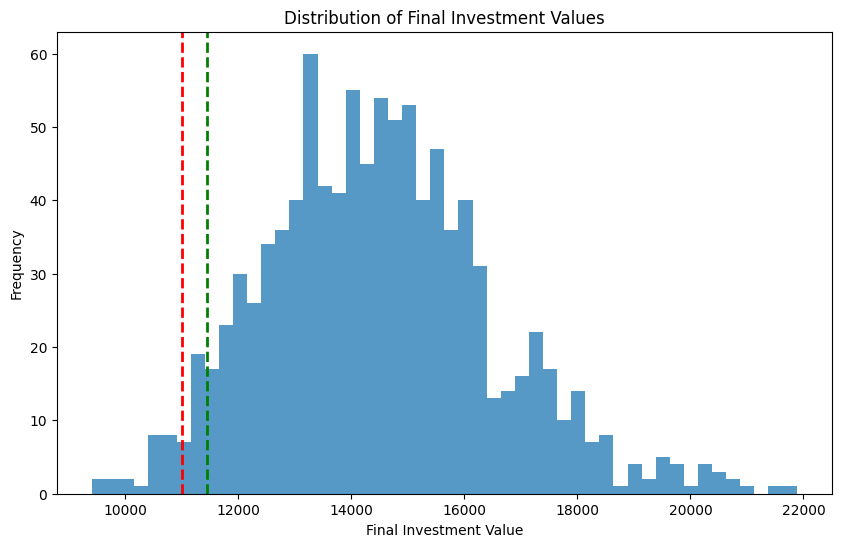

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(final_investment_values, bins=50, alpha=0.75)
plt.axvline(
      initial_investment * (1 + desired_return),
      color="r",
      linestyle="dashed",
      linewidth=2,
  )
plt.axvline(initial_investment - var, color="g", linestyle="dashed", linewidth=2)
plt.title("Distribution of Final Investment Values")
plt.xlabel("Final Investment Value")
plt.ylabel("Frequency")
plt.show()

Dotted red line:

This line indicates the investment value that corresponds to the desired return.

Interpretation

The red line answers the question, “Where do I hope my investment will end up, at a minimum?” It represents my goal or target for the investment. When looking at the histogram, any outcomes (or bars in the histogram) to the right of this line mean I’ve met or exceeded my desired return. Conversely, outcomes to the left indicate falling short of my goal.


Dotted Green Line

Purpose: This line marks the Value at Risk (VaR) at the specified confidence level (in this case, 95%).

Calculation: It’s shown as initial_investment - var. var here represents the pound amount I stand to lose with 95% confidence, meaning there's only a 5% chance my losses would exceed this amount.

Interpretation

The green line provides a visual cue for risk assessment. It tells me, “Given the risks I’m aware of, this is how much I could lose with fairly high confidence.” In the context of the histogram, it gives me a sense of how much of my investment’s potential outcomes involve losing more than what I’m relatively comfortable with. If many outcomes fall to the left of this line, my investment might be riskier than I am happy to accept.
When looking at the histogram:

Areas to the right of the red line indicate successful outcomes where my investment’s final value meets or exceeds my target return.
The area to the left of the green line highlights the portion of outcomes where losses exceed what I would expect 95% of the time, indicating the risk of worse-than-expected outcomes.

